In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on FRI Jul 27 13:54 2018
@author: Jacob Smith

Notebook file to generate histogram and CDF plots for the master_file.txt data file.
"""

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.colors import LogNorm

from astropy.table import QTable, Column
from astropy.io import ascii

%matplotlib inline

In [3]:
master_table = ascii.read( r'C:\Users\jacob\Documents\Rotation_Curve_Analysis\master_file.txt', format='ecsv')
void_gal = QTable( master_table[ master_table['vflag'] == 1])
wall_gal = QTable( master_table[ master_table['vflag'] == 0])
# void_mstar_log10 = np.log10( void_gal['Mstar NSA'].quantity)
# wall_mstar_log10 = np.log10( wall_gal['Mstar NSA'].quantity)

void_line = mlines.Line2D( [], [], color='red', label='Void')
wall_line = mlines.Line2D( [], [], color='black', label='Wall')

C:\Users\jacob\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


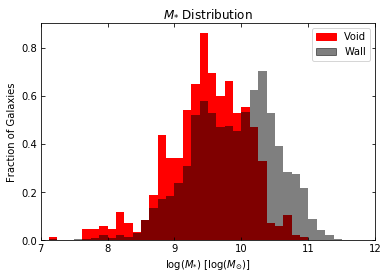

In [3]:
range_mstar_log10 = (7, 12)
bin_width_mstar_log10 = range_mstar_log10[1] / 96
bins_mstar_log10 = np.arange( 0, range_mstar_log10[1] + bin_width_mstar_log10, bin_width_mstar_log10)
void_patch = mpatches.Patch( color='red', label='Void')
wall_patch = mpatches.Patch( color='black', label='Wall', alpha=0.5)


void_mstar_hist = plt.figure(1)
plt.title(r'$M_{*}$ Distribution')
ax = void_mstar_hist.add_subplot(111)

plt.hist( np.ma.masked_invalid( void_mstar_log10),
        bins = bins_mstar_log10, color='r', range = range_mstar_log10, density=True)
plt.hist( np.ma.masked_invalid( wall_mstar_log10),
        bins = bins_mstar_log10, color='k', range= range_mstar_log10, density=True,
        alpha=0.5)

plt.ylabel('Fraction of Galaxies')
plt.xlabel(r'log($M_{*}$) [log($M_{\odot}$)]')
plt.tick_params( axis='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.xlim( range_mstar_log10)
plt.xticks( ( 7, 8, 9, 10, 11, 12))
plt.legend( handles = [ void_patch, wall_patch])
plt.show()

In [4]:
void_gal_VM = void_gal['Max Vel Best'].value
void_gal_RTM = void_gal['Turn Rad Max Best'].value
void_gal_AM = np.full( len( void_gal), -9.0)
for i in range( len( void_gal)):
    try:
        void_gal_AM[i] = float( void_gal['Alpha Max Best'][i])
    except:
        pass

void_gal_Vm = void_gal['Min Vel Best'].value
void_gal_RTm = void_gal['Turn Rad Min Best'].value
void_gal_Am = np.full( len( void_gal), -9.0)
for i in range( len( void_gal)):
    try:
        void_gal_Am[i] = float( void_gal['Alpha Min Best'][i])
    except:
        pass

void_gal_VM_masked = np.ma.masked_invalid( void_gal_VM)
void_gal_RTM_masked = np.ma.masked_invalid( void_gal_RTM)
void_gal_AM_masked = np.ma.masked_invalid( void_gal_AM)
void_gal_Vm_masked = np.ma.masked_invalid( void_gal_Vm)
void_gal_RTm_masked = np.ma.masked_invalid( void_gal_RTm)
void_gal_Am_masked = np.ma.masked_invalid( void_gal_Am)

In [5]:
void_VM_err = void_gal['Max Vel Err'].value
void_RTM_err = void_gal['Turn Rad Max Err'].value
void_AM_err = void_gal['Alpha Max Err']
void_Vm_err = void_gal['Min Vel Err'].value
void_RTm_err = void_gal['Turn Rad Min Err'].value
void_Am_err = void_gal['Alpha Min Err']

In [6]:
wall_gal_VM = wall_gal['Max Vel Best'].value
wall_gal_RTM = wall_gal['Turn Rad Max Best'].value
wall_gal_AM = np.full( len( wall_gal), -9.0)
for i in range( len( wall_gal)):
    try:
        wall_gal_AM[i] = float( wall_gal['Alpha Max Best'][i])
    except:
        pass

wall_gal_Vm = wall_gal['Min Vel Best'].value
wall_gal_RTm = wall_gal['Turn Rad Min Best'].value
wall_gal_Am = np.full( len( wall_gal), -9.0)
for i in range( len( wall_gal)):
    try:
        wall_gal_Am[i] = float( wall_gal['Alpha Min Best'][i])
    except:
        pass

wall_gal_VM_masked = np.ma.masked_invalid( wall_gal_VM)
wall_gal_RTM_masked = np.ma.masked_invalid( wall_gal_RTM)
wall_gal_AM_masked = np.ma.masked_invalid( wall_gal_AM)
wall_gal_Vm_masked = np.ma.masked_invalid( wall_gal_Vm)
wall_gal_RTm_masked = np.ma.masked_invalid( wall_gal_RTm)
wall_gal_Am_masked = np.ma.masked_invalid( wall_gal_Am)

In [7]:
wall_VM_err = wall_gal['Max Vel Err'].value
wall_RTM_err = wall_gal['Turn Rad Max Err'].value
wall_AM_err = wall_gal['Alpha Max Err']
wall_Vm_err = wall_gal['Min Vel Err'].value
wall_RTm_err = wall_gal['Turn Rad Min Err'].value
wall_Am_err = wall_gal['Alpha Min Err']

nan 0.08372834597959812


C:\Users\jacob\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  


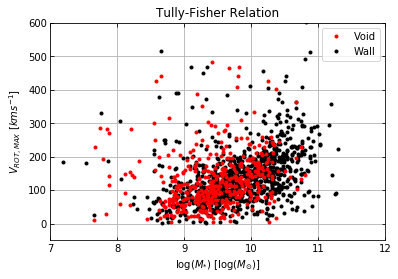

In [15]:
vmax_vs_mstar = plt.figure(3)
ax = vmax_vs_mstar.add_subplot(111)
plt.title('Tully-Fisher Relation')

wall_points, = plt.plot( wall_mstar_log10, wall_gal_VM_masked, 'ko', markersize=3)
void_points, = plt.plot( void_mstar_log10, void_gal_VM_masked, 'ro', markersize=3)

b, m = np.polyfit( wall_mstar_log10, wall_gal_VM_masked, 1, w = 1 / np.ma.masked_invalid( wall_VM_err))

print( b, m)

plt.plot( wall_mstar_log10, b + m * wall_mstar_log10, '-')

plt.ylabel(r'$V_{ROT, MAX}$ [$kms^{-1}$]')
plt.xlabel(r'log($M_{*}$) [log($M_{\odot}$)]')
plt.tick_params( axis='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.xlim( range_mstar_log10)
plt.ylim( (-50, 600))
plt.xticks( ( 7, 8, 9, 10, 11, 12))
plt.grid()
plt.legend( [ void_points, wall_points], ["Void", "Wall"])
plt.show()

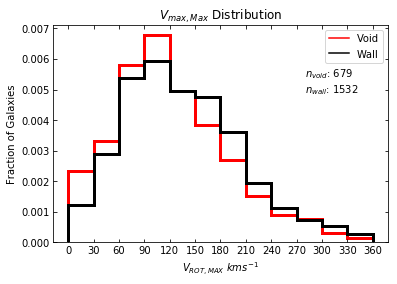

C:\Users\jacob\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jacob\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


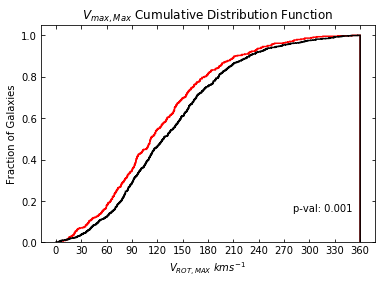

In [20]:
range1 = (0, 360)
bin_width1 = range1[1] / 12
bins1 = np.arange( 0, range1[1] + bin_width1, bin_width1)

VM_hist = plt.figure(11)
ax = VM_hist.add_subplot(111)
plt.title(r'$V_{max, Max}$ Distribution')

plt.hist( void_gal_VM_masked, bins = bins1, range = range1, 
         density = True, histtype='step', color='r', linewidth=3)
plt.hist( wall_gal_VM_masked, bins = bins1, range = range1, 
         density = True, histtype='step', color='k', linewidth=3)

plt.ylabel('Fraction of Galaxies')
plt.xlabel(r'$V_{ROT, MAX}$ $kms^{-1}$')
plt.tick_params( direction = 'in')
plt.xticks( bins1)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

plt.legend(handles=[void_line, wall_line])
plt.text( 280, 0.0049, r"$n_{void}$: " + str( len( void_gal)) + '\n' + r"$n_{wall}$: " + str( len( wall_gal)))
plt.show()


ks_stat1, p_val1 = scipy.stats.ks_2samp( wall_gal_VM_masked, void_gal_VM_masked)


VM_CDF = plt.figure(21)
ax = VM_CDF.add_subplot(111)
plt.title(r'$V_{max, Max}$ Cumulative Distribution Function')

plt.hist( void_gal_VM_masked, bins = 1000, range = range1, 
         density = True, cumulative = True, histtype = 'step', color = 'r', linewidth=1.5)
plt.hist( wall_gal_VM_masked, bins = 1000, range = range1, 
         density = True, cumulative = True, histtype = 'step', color = 'k', linewidth=1.5)

plt.ylabel('Fraction of Galaxies')
plt.xlabel(r'$V_{ROT, MAX}$ $kms^{-1}$')
plt.tick_params( direction = 'in')
plt.xticks( bins1)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.text( 280, 0.15, "p-val: " + "{:.{}f}".format( p_val1, 3))
plt.show()

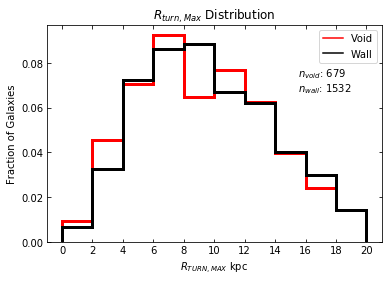

C:\Users\jacob\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jacob\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


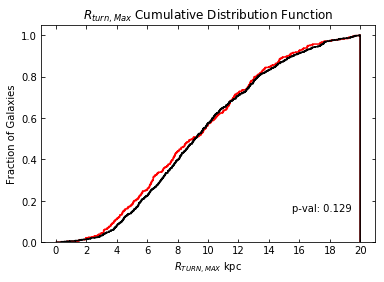

In [22]:
range2 = (0, 20)
bin_width2 = range2[1] / 10
bins2 = np.arange( 0, range2[1] + bin_width2, bin_width2)

RTM_hist = plt.figure(12)
ax = RTM_hist.add_subplot(111)
plt.title(r'$R_{turn, Max}$ Distribution')

plt.hist( void_gal_RTM_masked, bins = bins2, range = range2, 
         density = True, histtype='step', color='r', linewidth=3)
plt.hist( wall_gal_RTM_masked, bins = bins2, range = range2,
         density = True, histtype='step', color='k', linewidth=3)

plt.ylabel('Fraction of Galaxies')
plt.xlabel(r'$R_{TURN, MAX}$ kpc')
plt.tick_params( direction = 'in')
plt.xticks( bins2)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

plt.legend(handles=[void_line, wall_line])
plt.text( 15.5, 0.067, r"$n_{void}$: " + str( len( void_gal)) + '\n' + r"$n_{wall}$: " + str( len( wall_gal)))
plt.show()


ks_stat2, p_val2 = scipy.stats.ks_2samp( wall_gal_RTM_masked, void_gal_RTM_masked)


RTM_CDF = plt.figure(22)
ax = RTM_CDF.add_subplot(111)
plt.title(r'$R_{turn, Max}$ Cumulative Distribution Function')

plt.hist( void_gal_RTM_masked, bins = 1000, range = range2, 
         density = True, cumulative = True, histtype='step', color='r', linewidth=1.5)
plt.hist( wall_gal_RTM_masked, bins = 1000, range = range2,
         density = True, cumulative = True, histtype='step', color='k', linewidth=1.5)

plt.ylabel('Fraction of Galaxies')
plt.xlabel(r'$R_{TURN, MAX}$ kpc')
plt.tick_params( direction = 'in')
plt.xticks( bins2)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.text( 15.5, 0.15, "p-val: " + "{:.{}f}".format( p_val2, 3))
plt.show()

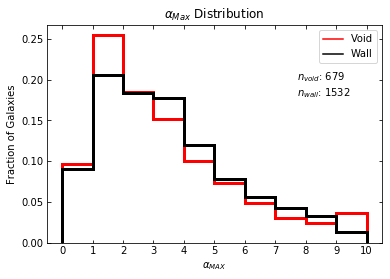

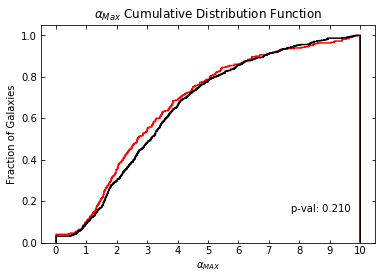

In [23]:
range3 = (0, 10)
bin_width3 = range3[1] / 10
bins3 = np.arange( 0, range3[1] + bin_width3, bin_width3)

AM_hist = plt.figure(13)
ax = AM_hist.add_subplot(111)
plt.title(r'$\alpha_{Max}$ Distribution')

plt.hist( void_gal_AM_masked, bins = bins3, range = range3, 
         density = True, histtype='step', color='r', linewidth=3)
plt.hist( wall_gal_AM_masked, bins = bins3, range = range3, 
         density = True, histtype='step', color='k', linewidth=3)

plt.ylabel('Fraction of Galaxies')
plt.xlabel(r'$\alpha_{MAX}$')
plt.tick_params( direction = 'in')
plt.xticks( bins3)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

plt.legend(handles=[void_line, wall_line])
plt.text( 7.72, 0.18, r"$n_{void}$: " + str( len( void_gal)) + '\n' + r"$n_{wall}$: " + str( len( wall_gal)))
plt.show()


ks_stat3, p_val3 = scipy.stats.ks_2samp( wall_gal_AM_masked, void_gal_AM_masked)


AM_CDF = plt.figure(23)
ax = AM_CDF.add_subplot(111)
plt.title(r'$\alpha_{Max}$ Cumulative Distribution Function')

plt.hist( void_gal_AM_masked, bins = 1000, range = range3, 
         density = True, cumulative = True, histtype='step', color='r', linewidth=1.5)
plt.hist( wall_gal_AM_masked, bins = 1000, range = range3, 
         density = True, cumulative = True, histtype='step', color='k', linewidth=1.5)

plt.ylabel('Fraction of Galaxies')
plt.xlabel(r'$\alpha_{MAX}$')
plt.tick_params( direction = 'in')
plt.xticks( bins3)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.text( 7.72, 0.15, "p-val: " + "{:.{}f}".format( p_val3, 3))
plt.show()

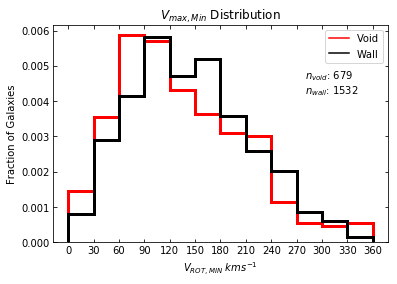

C:\Users\jacob\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jacob\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


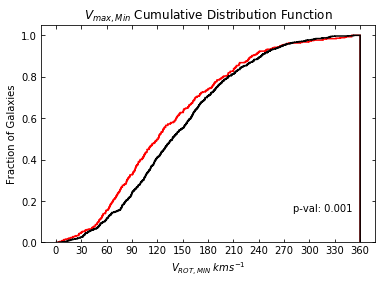

In [25]:
range4 = (0, 360)
bin_width4 = range4[1] / 12
bins4 = np.arange( 0, range4[1] + bin_width4, bin_width4)

Vm_hist = plt.figure(14)
ax = Vm_hist.add_subplot(111)
plt.title(r'$V_{max, Min}$ Distribution')

plt.hist( void_gal_Vm_masked, bins = bins4, range = range4, 
         density = True, histtype='step', color='r', linewidth=3)
plt.hist( wall_gal_Vm_masked, bins = bins4, range = range4, 
         density = True, histtype='step', color='k', linewidth=3)

plt.ylabel('Fraction of Galaxies')
plt.xlabel(r'$V_{ROT, MIN}$ $kms^{-1}$')
plt.tick_params( direction = 'in')
plt.xticks( bins4)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

plt.legend(handles=[void_line, wall_line])
plt.text( 280, 0.0042, r"$n_{void}$: " + str( len( void_gal)) + '\n' + r"$n_{wall}$: " + str( len( wall_gal)))
plt.show()


ks_stat4, p_val4 = scipy.stats.ks_2samp( wall_gal_Vm_masked, void_gal_Vm_masked)


Vm_CDF = plt.figure(24)
ax = Vm_CDF.add_subplot(111)
plt.title(r'$V_{max, Min}$ Cumulative Distribution Function')

plt.hist( void_gal_Vm_masked, bins = 1000, range = range4, 
         density = True, cumulative = True, histtype='step', color='r', linewidth=1.5)
plt.hist( wall_gal_Vm_masked, bins = 1000, range = range4, 
         density = True, cumulative = True, histtype='step', color='k', linewidth=1.5)

plt.ylabel('Fraction of Galaxies')
plt.xlabel(r'$V_{ROT, MIN}$ $kms^{-1}$')
plt.tick_params( direction = 'in')
plt.xticks( bins4)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.text( 280, 0.15, "p-val: " + "{:.{}f}".format( p_val4, 3))
plt.show()

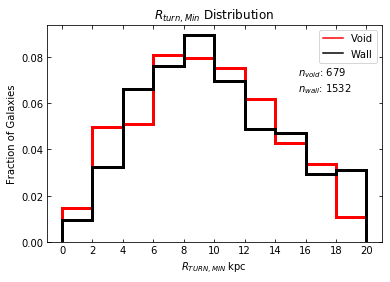

C:\Users\jacob\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jacob\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


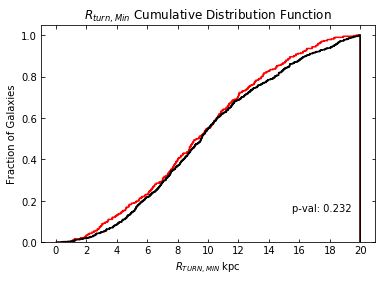

In [26]:
range5 = (0, 20)
bin_width5 = range5[1] / 10
bins5 = np.arange( 0, range5[1] + bin_width5, bin_width5)

RTm_hist = plt.figure(15)
ax = RTm_hist.add_subplot(111)
plt.title(r'$R_{turn, Min}$ Distribution')

plt.hist( void_gal_RTm_masked, bins = bins5, range = range5, 
         density = True, histtype='step', color='r', linewidth=3)
plt.hist( wall_gal_RTm_masked, bins = bins5, range = range5, 
         density = True, histtype='step', color='k', linewidth=3)

plt.ylabel('Fraction of Galaxies')
plt.xlabel(r'$R_{TURN, MIN}$ kpc')
plt.tick_params( direction = 'in')
plt.xticks( bins5)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

plt.legend(handles=[void_line, wall_line])
plt.text( 15.5, 0.065, r"$n_{void}$: " + str( len( void_gal)) + '\n' + r"$n_{wall}$: " + str( len( wall_gal)))
plt.show()


ks_stat5, p_val5 = scipy.stats.ks_2samp( wall_gal_RTm_masked, void_gal_RTm_masked)


RTm_CDF = plt.figure(25)
ax = RTm_CDF.add_subplot(111)
plt.title(r'$R_{turn, Min}$ Cumulative Distribution Function')

plt.hist( void_gal_RTm_masked, bins = 1000, range = range5, 
         density = True, cumulative = True, histtype='step', color='r', linewidth=1.5)
plt.hist( wall_gal_RTm_masked, bins = 1000, range = range5, 
         density = True, cumulative = True, histtype='step', color='k', linewidth=1.5)

plt.ylabel('Fraction of Galaxies')
plt.xlabel(r'$R_{TURN, MIN}$ kpc')
plt.tick_params( direction = 'in')
plt.xticks( bins5)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.text( 15.5, 0.15, "p-val: " + "{:.{}f}".format( p_val5, 3))
plt.show()

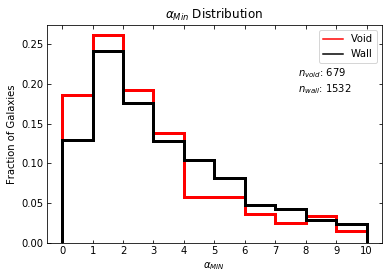

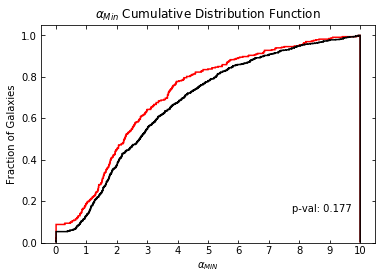

In [27]:
range6 = (0, 10)
bin_width6 = range6[1] / 10
bins6 = np.arange( 0, range6[1] + bin_width6, bin_width6)

Am_hist = plt.figure(16)
ax = Am_hist.add_subplot(111)
plt.title(r'$\alpha_{Min}$ Distribution')

plt.hist( void_gal_Am_masked, bins = bins6, range = range6, 
         density = True, histtype='step', color='r', linewidth=3)
plt.hist( wall_gal_Am_masked, bins = bins6, range = range6, 
         density = True, histtype='step', color='k', linewidth=3)

plt.ylabel('Fraction of Galaxies')
plt.xlabel(r'$\alpha_{MIN}$')
plt.tick_params( direction = 'in')
plt.xticks( bins6)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

plt.legend(handles=[void_line, wall_line])
plt.text( 7.75, 0.19, r"$n_{void}$: " + str( len( void_gal)) + '\n' + r"$n_{wall}$: " + str( len( wall_gal)))
plt.show()


ks_stat6, p_val6 = scipy.stats.ks_2samp( wall_gal_Am_masked, void_gal_Am_masked)


Am_CDF = plt.figure(26)
ax = Am_CDF.add_subplot(111)
plt.title(r'$\alpha_{Min}$ Cumulative Distribution Function')

plt.hist( void_gal_Am_masked, bins = 1000, range = range6, 
         density = True, cumulative = True, histtype='step', color='r', linewidth=1.5)
plt.hist( wall_gal_Am_masked, bins = 1000, range = range6, 
         density = True, cumulative = True, histtype='step', color='k', linewidth=1.5)

plt.ylabel('Fraction of Galaxies')
plt.xlabel(r'$\alpha_{MIN}$')
plt.tick_params( direction = 'in')
plt.xticks( bins6)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.text( 7.75, 0.15, "p-val: " + "{:.{}f}".format( p_val6, 3))
plt.show()